In [1]:
ls

Jareds.ipynb             df4.csv                  seraj.ipynb
README.md                df_q1.csv                weston.ipynb
data_exploration.ipynb   more_explorations.ipynb  zippedData/


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
 df = pd.read_csv('df4.csv')
df

,index,id,release_date,production_budget,worldwide_gross,genre_ids
0,#Horror,16,2015,1500000,0,Drama
1,#Horror,16,2015,1500000,0,Mystery
2,#Horror,16,2015,1500000,0,Horror
3,#Horror,16,2015,1500000,0,Thriller
4,10 Cloverfield Lane,54,2016,5000000,108286422,Thriller
...,...,...,...,...,...,...
5463,mother!,59,2017,30000000,42531076,Horror
5464,mother!,59,2017,30000000,42531076,Mystery
5465,xXx: Return of Xander Cage,15,2017,85000000,345033359,Action
5466,xXx: Return of Xander Cage,15,2017,85000000,345033359,Adventure


# Creating new columns to establish the profit made on movie and if the movie was profitable 

In [4]:
df['profit'] = df['worldwide_gross'] - df['production_budget']
df['profitable'] = (df['worldwide_gross'] >= 2* df['production_budget'])

 

# Transforming the dataset to relevant years

In [5]:
#df1 = df.loc[:, ['production_budget','worldwide_gross','genre_ids','release_date','profit']]
#df2 = df1.loc[:, ['profit','genre_ids']]
df3 = df[(df['release_date'] >= 2012) & (df['release_date'] <= 2015)]
df4 = df[(df['release_date'] >= 2016) & (df['release_date'] < 2019)]

# Isolating the genres I want to put in use 

In [6]:
 # 2013-2015
d = df3.loc[df3['genre_ids'] == 'Drama'] 
a = df3.loc[df3['genre_ids'] == 'Action'] 

  #2016 -2018
d1 = df4.loc[df4['genre_ids'] == 'Drama'] 
a1 = df4.loc[df4['genre_ids'] == 'Action'] 

# Isolating to just the profit column

In [7]:
dp = d['profit'] #drama movie profit

ap = a['profit'] #action movie profit

d1p = d1['profit'] #drama movie profit(2016-2018)

a1p = a1['profit'] #action movie profit(2016-2018)

In [14]:
d

,index,id,release_date,production_budget,worldwide_gross,genre_ids,profit,profitable
0,#Horror,16,2015,1500000,0,Drama,-1500000,False
7,10 Days in a Madhouse,48,2015,12000000,14616,Drama,-11985384,False
12,12 Years a Slave,18,2013,20000000,181025343,Drama,161025343,True
39,23 Blast,64,2014,1000000,549185,Drama,-450815,False
45,3 Days to Kill,64,2014,28000000,38959900,Drama,10959900,False
...,...,...,...,...,...,...,...,...
5398,Wuthering Heights,30,2012,8000000,2721534,Drama,-5278466,False
5436,Your Sister's Sister,73,2012,120000,3090593,Drama,2970593,True
5439,Youth,99,2015,13000000,24001573,Drama,11001573,False
5445,Zero Dark Thirty,66,2012,52500000,134612435,Drama,82112435,True


In [20]:
drama_prof12 = d.groupby('release_date')['profit'].mean()
dp_index12 = list(drama_prof12.index)
dp_vals12 = list(drama_prof12.values)

In [21]:
drama_prof16 = d1.groupby('release_date')['profit'].mean()
dp_index16 = list(drama_prof16.index)
dp_vals16 = list(drama_prof16.values)

In [17]:
dp

0        -1500000
7       -11985384
12      161025343
39        -450815
45       10959900
          ...    
5398     -5278466
5436      2970593
5439     11001573
5445     82112435
5448     -4500000
Name: profit, Length: 455, dtype: int64

# Comparing the profit made on drama movies over 6 years

This is the average profit made for drama movies from 2012 to 2015: $46986430
This is how dispersed the data from 2012 to 2015 is in relation to the mean : 4.69
This is the average profit made for drama movies from 2016 to 2018: $58798066
This is how dispersed the data from 2016 to 2019 is in relation to the mean : 1.27
The average increased by: 25.13839846951556


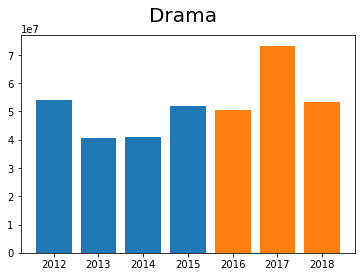

In [22]:
print('This is the average profit made for drama movies from 2012 to 2015: ${}'.format(int(dp.mean())))
print('This is how dispersed the data from 2012 to 2015 is in relation to the mean : 4.69')
print('This is the average profit made for drama movies from 2016 to 2018: ${}'.format(int(d1p.mean())))
print('This is how dispersed the data from 2016 to 2019 is in relation to the mean : 1.27')
print('The average increased by: {}'.format(11811636/46986430 *100))

fig = plt.figure()
plt.bar(dp_index12,dp_vals12)
plt.bar(dp_index16,dp_vals16);
fig.suptitle('Drama', fontsize=20);


# Comparing the profit made on Action movies over 6 years

In [23]:
action_prof12 = a.groupby('release_date')['profit'].mean()
ap_index12 = list(action_prof12.index)
ap_vals12 = list(action_prof12.values)

action_prof16 = a1.groupby('release_date')['profit'].mean()
ap_index16 = list(action_prof16.index)
ap_vals16 = list(action_prof16.values)

This is the average profit made for actions movies from 2012 to 2015: $163502551
This is how dispersed the data from 2012 to 2015 is in relation to the mean : 2.61
This is the average profit made for actions movies from 2016 to 2018: $212700944
This is how dispersed the data from 2016 to 2018 is in relation to the mean : 3.23
The average increased by: 30.090290762497034


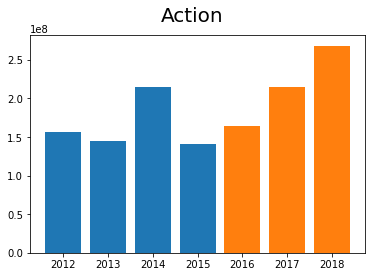

In [24]:
print('This is the average profit made for actions movies from 2012 to 2015: ${}'.format(int(ap.mean())))
print('This is how dispersed the data from 2012 to 2015 is in relation to the mean : 2.61')
print('This is the average profit made for actions movies from 2016 to 2018: ${}'.format(int(a1p.mean())))
print('This is how dispersed the data from 2016 to 2018 is in relation to the mean : 3.23')
print('The average increased by: {}'.format((49198393/163502551 *100)))


fig = plt.figure()
plt.bar(ap_index12,ap_vals12)
plt.bar(ap_index16,ap_vals16);
fig.suptitle('Action', fontsize=20);


# Isolating the genres I want to put in use 

In [30]:
t = df3.loc[df3['genre_ids'] == 'Thriller'] 
ad = df3.loc[df3['genre_ids'] == 'Adventure'] 

t1 = df4.loc[df4['genre_ids'] == 'Thriller'] 
ad1 = df4.loc[df4['genre_ids'] == 'Adventure'] 

# Isolating to just the profit column

In [31]:
tp = t['profit']  # thriller movie profit
adp = ad['profit'] # adventure movie profit

t1p = t1['profit'] # thriller movie profit - (2016-2018)
ad1p = ad1['profit']# adventure movie profit - (2016-2018)

In [32]:
thriller_prof12 = t.groupby('release_date')['profit'].mean()
tp_index12 = list(thriller_prof12.index)
tp_vals12 = list(thriller_prof12.values)

thriller_prof16 = t1.groupby('release_date')['profit'].mean()
tp_index16 = list(thriller_prof16.index)
tp_vals16 = list(thriller_prof16.values)

# Comparing the profit made on Thriller movies over 6 years

This is the average profit made for thriller movies from 2012 to 2015: $60207664
This is how dispersed the data from 2012 to 2015 is in relation to the mean : 1.72
This is the average profit made for thriller movies from 2016 to 2018: $73565937
This is how dispersed the data from 2016 to 2018 is in relation to the mean : 1.42
The average increased by: 22.18699765531511


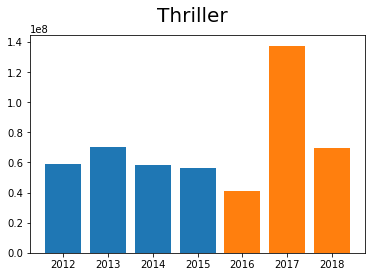

In [33]:
print('This is the average profit made for thriller movies from 2012 to 2015: ${}'.format(int(tp.mean())))
print('This is how dispersed the data from 2012 to 2015 is in relation to the mean : 1.72')
print('This is the average profit made for thriller movies from 2016 to 2018: ${}'.format(int(t1p.mean())))
print('This is how dispersed the data from 2016 to 2018 is in relation to the mean : 1.42')
print('The average increased by: {}'.format(13358273/60207664 *100))

fig = plt.figure()
plt.bar(tp_index12,tp_vals12)
plt.bar(tp_index16,tp_vals16);
fig.suptitle('Thriller', fontsize=20);


# Comparing the profit made on Adventure movies over 6 years

In [34]:
adventure_prof12 = ad.groupby('release_date')['profit'].mean()
ad_index12 = list(adventure_prof12.index)
ad_vals12 = list(adventure_prof12.values)

adventure_prof16 = ad1.groupby('release_date')['profit'].mean()
ad_index16 = list(adventure_prof16.index)
ad_vals16 = list(adventure_prof16.values)

This is the average profit made for Adventure movies from 2012 to 2015: $247217835
This is how dispersed the data from 2012 to 2015 is in relation to the mean : 3.02
This is the average profit made for Adventure movies from 2016 to 2018: $295843771
This is how dispersed the data from 2016 to 2018 is in relation to the mean : 3.45
The average increased by: 19.669266984722196


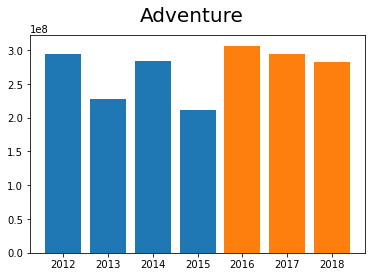

In [35]:
print('This is the average profit made for Adventure movies from 2012 to 2015: ${}'.format(int(adp.mean())))
print('This is how dispersed the data from 2012 to 2015 is in relation to the mean : 3.02')
print('This is the average profit made for Adventure movies from 2016 to 2018: ${}'.format(int(ad1p.mean())))
print('This is how dispersed the data from 2016 to 2018 is in relation to the mean : 3.45')
print('The average increased by: {}'.format(48625936/247217835 *100))

fig = plt.figure()
plt.bar(ad_index12,ad_vals12)
plt.bar(ad_index16,ad_vals16);
fig.suptitle('Adventure', fontsize=20);


# looping through all of them!


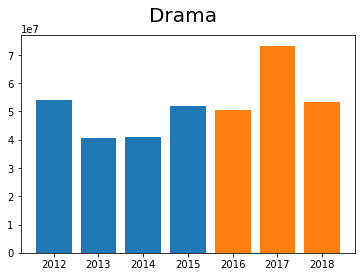

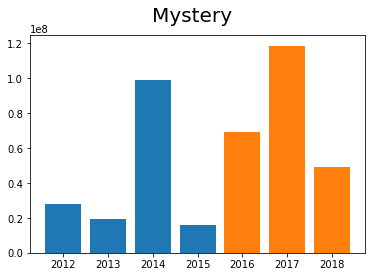

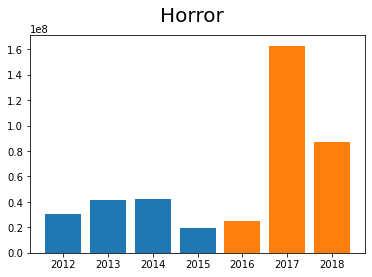

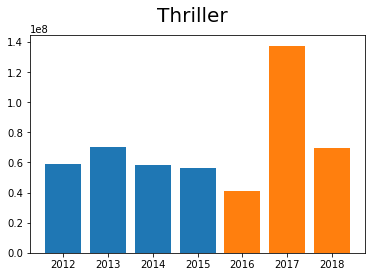

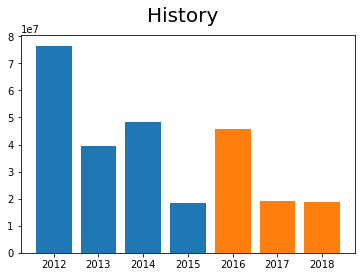

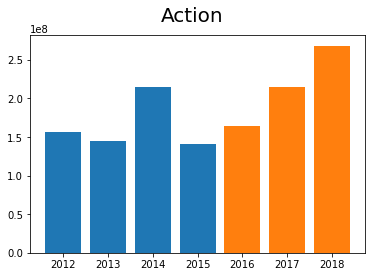

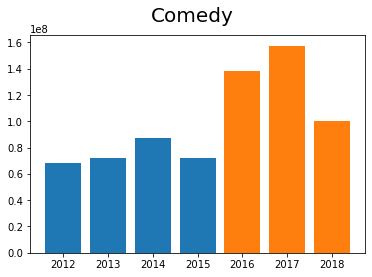

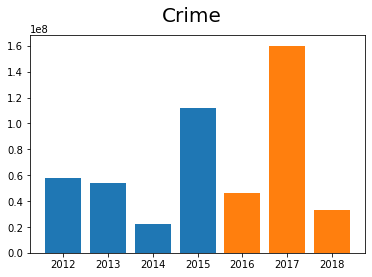

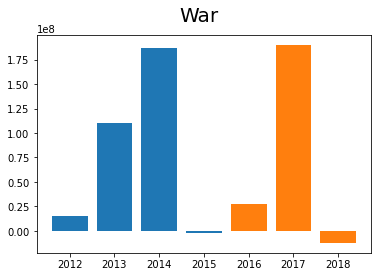

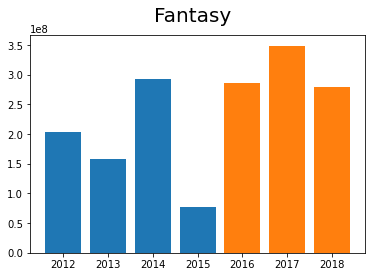

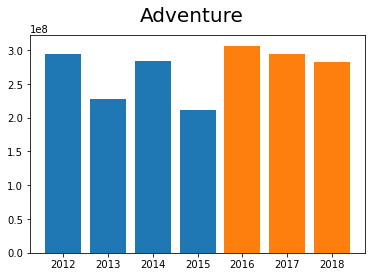

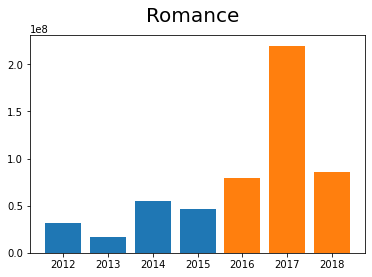

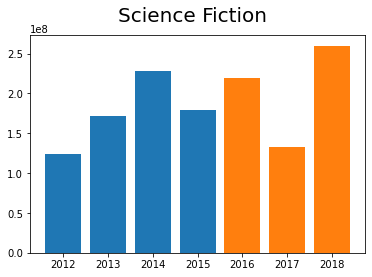

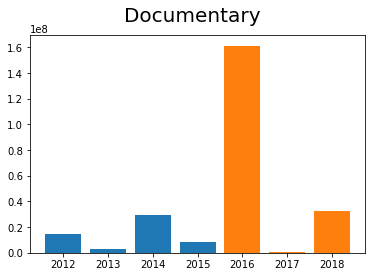

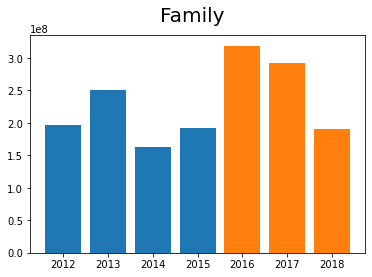

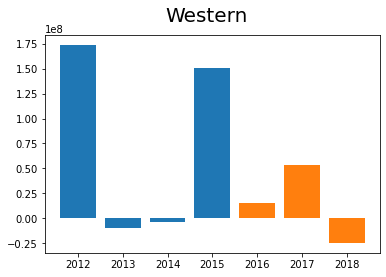

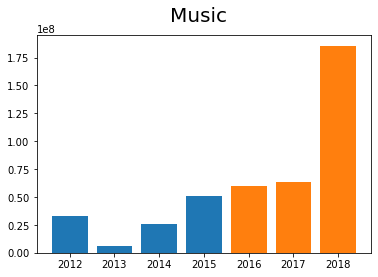

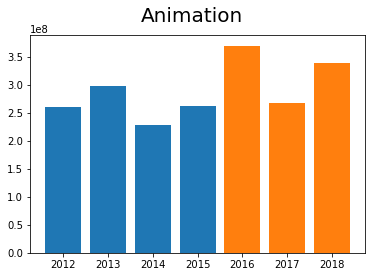

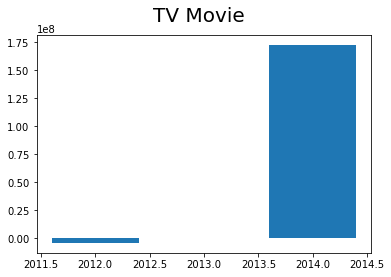

In [40]:
graphs_dict = {}

for genre in list(df3['genre_ids'].unique()):
    
    a1 = df3.loc[df3['genre_ids'] == genre]   
    a2 = df4.loc[df4['genre_ids'] == genre] 
    
    a_prof12 = a1.groupby('release_date')['profit'].mean()
    a_index12 = list(a_prof12.index)
    a_vals12 = list(a_prof12.values)

    a_prof16 = a2.groupby('release_date')['profit'].mean()
    a_index16 = list(a_prof16.index)
    a_vals16 = list(a_prof16.values)
    
    fig = plt.figure()
    plt.bar(a_index12,a_vals12)
    plt.bar(a_index16,a_vals16);
    fig.suptitle(genre, fontsize=20);
    
    graphs_dict[genre] = fig

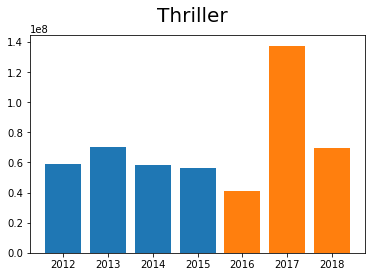

In [41]:
graphs_dict['Thriller']